## Linear Regression with `numpy.polyfit()` and `numpy.lstsq()`
NumPy provides a number of functions that can be used in solving regression problems. In this course, we will take a look at `polyfit()` and `lstsq()`. 

### **Simple Linear Regression with `numpy.polyfit()`**

Simple linear regression analyzes the relationship between one independent variable and one dependent variable, while multiple linear regression examines the relationship between multiple independent variables and a single dependent variable; essentially, "simple" refers to using only one predictor variable, whereas "multiple" indicates using two or more predictor variables

We will use `numpy.ployfit()` for simple linear regression. `numpy.polyfit()` finds the coefficients of a polynomial that best fits the input data using the least-squares method.
When calling polyfit, we specify the degree of the polynomial we want to fit (e.g., 1 for a line, 2 for a parabola, etc.). 

`polyfit()` returns an array of coefficients, starting with the highest power of x, which can then be used to construct the polynomial. 

### Syntax

In [ ]:
import numpy as np

coefficients = np.polyfit(x, y, deg)

### Parameters:
**x**: An array of x-coordinates for your data points.

**y**: An array of y-coordinates corresponding to the x-coordinates.

**deg**: The degree of the polynomial you want to fit (an integer).

### Output: 

**coefficients**: An array containing the coefficients of the polynomial.

p:  
1.4 x + 0.8


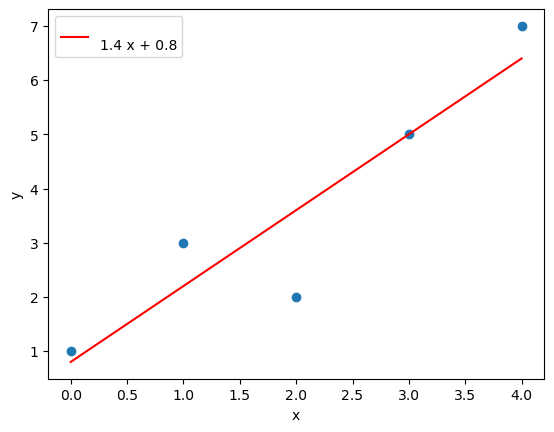

In [1]:
# Linear Regression with numpy polyfit() Step by Step
# Step 1: import the necessary modules
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Set up (or read in) the training data
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 3, 2, 5, 7])

# Step 3: Use numpy.polyfit() to construct the regression model.
coefficients = np.polyfit(x, y, 1) 

# Step 4 - Option A: Use numpy.poly1d to construct a polynomial (function, same as the regression model)
# Note: Technically, the output of poly1d() is a "callable" object.
p = np.poly1d(coefficients)
print("p:",p)
# Step 4 - Option B: Use the coefficients directly
# Coefficients are ordered from highest to lowest degree
intercept_b = coefficients[1]
slope_m = coefficients[0]

test_x = 2.5
# Step 5: Use the model to predict the value of y based on given x
prediction = slope_m * test_x + intercept_b

# Optional Step 6: Plot the original data and the fitted line
plt.scatter(x, y)
plt.plot(x, p(x), label = p.__str__(), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### **Multiple Linear Regression with `numpy.linalg.lstsq`**
In multi-variable linear regression, we predict a dependent variable \( y \) based on multiple independent variables \( $x_1, x_2, \ldots, x_n $\). The regression equation is:

$$y = m_1 \cdot x_1 + m_2 \cdot x_2 + \ldots + c$$

For example, we can predict the price of a car (\( y \)) based on:
- \( $x_1$\): Year the car was built.
- \( $x_2$ \): Mileage of the car.

---

The `numpy.linalg.lstsq` function minimizes the residual sum of squares to solve:

$$
\text{minimize} \|Ax - b\|^2
$$

Where:
- \( A \): Matrix of independent variables.
- \( b \): Vector of observed dependent variable values.
- \( x \): Vector of regression coefficients (\( $m_1, m_2, c$ \)).

---

The regression equation \( $y = m_1 \cdot x_1 + m_2 \cdot x_2 + c $\) can be rewritten in matrix form:

$$
\begin{bmatrix} x_{1,1} & x_{1,2} & 1 \\ x_{2,1} & x_{2,2} & 1 \\ \vdots & \vdots & \vdots \\ x_{n,1} & x_{n,2} & 1 \end{bmatrix} 
\cdot 
\begin{bmatrix} m_1 \\ m_2 \\ c \end{bmatrix} 
= 
\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}
$$

---

### **Sample Problem:**
Perform a multiple linear regression using NumPy's `lstsq` method to predict car prices based on two independent variables:
- **Year** the car was built.
- **Mileage** of the car.

---

### **Regression Model:**

We aim to model the relationship:

$$\text{Price} = m_{\text{year}} \cdot \text{Year} + m_{\text{mileage}} \cdot \text{Mileage} + c$$

where:
- $m_{\text{year}}$ is the coefficient for the **Year**.
- $m_{\text{mileage}}$ is the coefficient for the **Mileage**.
- $c$ is the intercept.

This model allows us to predict car prices based on their year and mileage.

---

### **Step 1: Generate or Acquire Data**

We generate a simple dataset for illustration:

```python
import pandas as pd

# Create the dataset
data = {
    "Year": [2010, 2012, 2015, 2018, 2020],
    "Mileage": [120000, 90000, 40000, 20000, 10000],
    "Price": [5000, 7000, 15000, 20000, 25000]
}
df = pd.DataFrame(data)
```

---

### **Step 2: Prepare the Data**

The independent variables (features) are `Year` and `Mileage`, and the dependent variable (target) is `Price`.

$A$ = $\begin{bmatrix}
\text{Year}_1 & \text{Mileage}_1 & 1 \\
\text{Year}_2 & \text{Mileage}_2 & 1 \\
\vdots & \vdots & \vdots \\
\text{Year}_n & \text{Mileage}_n & 1
\end{bmatrix}$

Here, we use `np.column_stack` to prepare the matrix `A`:

```python
import numpy as np

# Extract independent variables and dependent variable
X_year = df['Year'].values
X_mileage = df['Mileage'].values
y = df['Price'].values

# Combine features into matrix A using np.column_stack
A = np.column_stack([X_year, X_mileage, np.ones(len(X_year))])
```

---

### **Step 3: Generate the Regression Model**

We solve the regression equation using `numpy.linalg.lstsq`:

$$\textbf{coefficients}, \textbf{residuals}, \textbf{rank}, \textbf{singular\_values} = \text{np.linalg.lstsq}(A, y, \text{rcond=None})$$

```python
# Solve the least squares regression
coefficients, residuals, rank, singular_values = np.linalg.lstsq(A, y, rcond=None)

# Extract coefficients
m_year, m_mileage, c = coefficients
print(f"Coefficient for Year (m_year): {m_year:.2f}")
print(f"Coefficient for Mileage (m_mileage): {m_mileage:.2f}")
print(f"Intercept (c): {c:.2f}")
```

#### **Parameters of `lstsq`**
1. **`A`**: The (design) matrix that contains the independent variables and the column of ones.
2. **`y`**: Known target values of the dependent variable (price).
3. **`rcond=None`**: Automatically select what singular values to ignore in the SVD decomposition used internally.

#### **Outputs**
1. **`coefficients`**: Estimated regression coefficients $[m_{\text{year}}, m_{\text{mileage}}, c]$.
2. **`residuals`**: Sum of squared residuals (goodness-of-fit metric).
3. **`rank`**: Rank of the matrix $A$ (number of linearly independent columns).
4. **`singular_values`**: Singular values of $A$ (related to matrix conditioning).

---

### **Step 4: Use the Regression Model to Make Predictions**

```python
test_year = 2012
test_mileage = 90000
# Remember: Coefficients follow the order in the design matrix
predicted_price = coefficients[0]*test_year + coefficients[1]*test_mileage + coefficients[2]
```

---


### **Step 5: Visualize Data Points and the Regression Plane (Not in Quiz 4)**

To better understand the model, we visualize:
1. The actual data points.
2. The regression plane.

```python
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Patch

# Scatter plot of actual data points
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_year, X_mileage, y, color='blue', label='Actual Data')

# Generate grid for prediction surface
year_grid, mileage_grid = np.meshgrid(
    np.linspace(X_year.min(), X_year.max(), 20),
    np.linspace(X_mileage.min(), X_mileage.max(), 20)
)
price_grid = m_year * year_grid + m_mileage * mileage_grid + c

# Plot the prediction surface
ax.plot_surface(year_grid, mileage_grid, price_grid, color='orange', alpha=0.6)

# Add legend
data_proxy = Patch(color='blue', label='Actual Data')
surface_proxy = Patch(color='orange', label='Regression Plane')
ax.legend(handles=[data_proxy, surface_proxy])

# Set labels
ax.set_xlabel('Year')
ax.set_ylabel('Mileage')
ax.set_zlabel('Price')
ax.set_title('Car Price Prediction: Data Points and Regression Plane')
plt.show()
```

---

### **Interpretation of Results**

#### **Coefficients**
The coefficients determine how the independent variables impact the dependent variable:
- $m_{\text{year}}$: Incremental price change for one additional year.
- $m_{\text{mileage}}$: Incremental price change for one additional mile.
- $c$: Baseline price when both features are zero (useful for predictions but not directly meaningful here).

#### **Residuals**
The sum of squared residuals represents the error between the actual and predicted prices:
\[
$\text{Residuals} = \sum (y_{\text{actual}} - y_{\text{predicted}})^2$
\]

#### **Rank**
The rank of $A$ indicates whether the features are linearly independent. If the rank is less than the number of features, the problem is underdetermined.

---

### **Example Output and Explanation**

The output for the sample data:

```
Coefficient for Year (m_year): 2084.25
Coefficient for Mileage (m_mileage): -0.09
Intercept (c): -4185573.20
Residuals (Sum of Squared Errors): [3062154.70]
Rank of A: 3
Singular Values of A: [1.56885018e+05 2.71886912e+03 8.92101986e-04]
```


1. **Year Coefficient ($m_{\text{year}}$)**: For every additional year, the car price increases by approximately \$2084.
2. **Mileage Coefficient ($m_{\text{mileage}}$)**: For every additional mile, the car price decreases by approximately \$0.09.
3. **Intercept ($c$)**: A theoretical baseline when both year and mileage are zero.



#### Very Simple, Bare-bones Example (Know the Steps for Quiz):

In [ ]:
import numpy as np

# Step 1: Generate or read data
X1 = np.array([2, 3, 4, 5, 6])
X2 = np.array([1, 2, 3, 4, 5])
y = np.array([5, 8, 11, 14, 17])

# Step 2: Prepare design matrix: Add a column of ones to X for the intercept term
X = np.column_stack((X1, X2, (np.ones(len(X1)))))

# Step 3: Generate the model: Use numpy.linalg.lstsq to solve for the coefficients
coefficients, _, _, _ = np.linalg.lstsq(X, y, rcond=None)
# We won't be using the other elements of the lstsq() output:
# coefficients, residuals, rank, singular_values

# Extract the coefficients
beta1, beta2, intercept = coefficients

print("Intercept:", intercept)
print("Beta1:", beta1)
print("Beta2:", beta2)
x_1 = 3
x_2 = 2
# Step 4: Use the model to make predictions
predicted_value = beta1 * x_1 + beta2 * x_2 + intercept
print("predicted value for x_1=",x_1,"x_2=",x_2,"is:",predicted_value)

### Car Prices Example Code (Not in Quiz 4)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate the dataset
data = {
    "Year": [2010, 2012, 2015, 2018, 2020],
    "Mileage": [120000, 90000, 40000, 20000, 10000],
    "Price": [5000, 7000, 15000, 20000, 25000]
}
df = pd.DataFrame(data)

# Extract independent variables (Year, Mileage) and dependent variable (Price)
X_year = df['Year'].values
X_mileage = df['Mileage'].values
y = df['Price'].values

# Combine independent variables (Year and Mileage) into a single matrix using column_stack
A = np.column_stack([X_year, X_mileage, np.ones(len(X_year))])

# Solve the regression problem using lstsq
coefficients, residuals, rank, singular_values = np.linalg.lstsq(A, y, rcond=None)

# Output explanations:
# 1. `coefficients`: Contains the estimated regression coefficients (slopes and intercept).
#    - These represent the impact of each independent variable on the dependent variable.
# 2. `residuals`: Sum of squared residuals (difference between observed and predicted values).
#    - Indicates the model's goodness of fit; a smaller value means a better fit.
# 3. `rank`: Rank of the input matrix `A`.
#    - Indicates the number of linearly independent columns in the matrix `A`.
#    - If `rank` is less than the number of columns in `A`, the problem is underdetermined.
# 4. `singular_values`: Singular values of `A`.
#    - Provides insight into the condition of the matrix and its invertibility.

# Extract coefficients
m_year, m_mileage, c = coefficients

print(f"Coefficient for Year (m_year): {m_year:.2f}")
print(f"Coefficient for Mileage (m_mileage): {m_mileage:.2f}")
print(f"Intercept (c): {c:.2f}")

# Print additional outputs with explanations
print(f"Residuals (Sum of Squared Errors): {residuals}")
print(f"Rank of A: {rank}")
print(f"Singular Values of A: {singular_values}")

# Generate predicted prices for original data
y_pred = A @ coefficients

# Visualization of data points and prediction surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of actual data points
ax.scatter(X_year, X_mileage, y, color='blue', label='Actual Data')

# Generate grid for prediction surface
year_grid, mileage_grid = np.meshgrid(
    np.linspace(X_year.min(), X_year.max(), 20),
    np.linspace(X_mileage.min(), X_mileage.max(), 20)
)
price_grid = m_year * year_grid + m_mileage * mileage_grid + c

# Plot the prediction surface
ax.plot_surface(year_grid, mileage_grid, price_grid, color='orange', alpha=0.6)

# Set labels
ax.set_xlabel('Year')
ax.set_ylabel('Mileage')
ax.set_zlabel('Price')
ax.set_title('Car Price Prediction: Data Points and Regression Surface')
ax.legend()

plt.show()


### **Logistic Regression Using Sci-kit Learn (Not in Quiz 4)**

Please refer to the lecture notes at https://github.com/alp1991/ECE3_FALL24/blob/main/lectures/04c_predicting_from_data__logistic_regression.ipynb for the discussion on Logistic Regression.

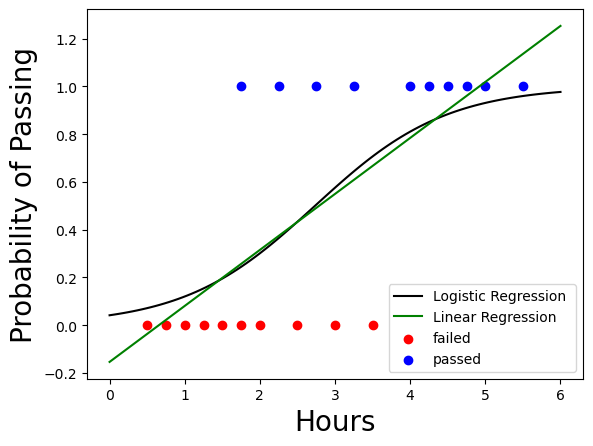

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Step 1: Generate or read data
hours = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
score = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

failed = score == 0
passed = score == 1

# For comparison only
p = np.poly1d(np.polyfit(hours,score,1))

# Step 2: Generate the Logistic Function to Fit the Data
clf = LogisticRegression(random_state=0).fit(hours[:,None], score)

# Step 3: Use the Logistic Regression Function to Make Predictions
xx = np.linspace(0, 6, 100)
yy = clf.predict_proba(xx[:,None])[:,1]
zz = p(xx)

plt.plot(xx, yy, color='black', label="Logistic Regression ")
plt.plot(xx, zz, color='green', label="Linear Regression ")

plt.scatter(hours[failed], score[failed], c='red', label="failed")
plt.scatter(hours[passed], score[passed], c='blue', label="passed")
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Probability of Passing", fontsize=20)
plt.legend()
plt.show()